
# Pokemon Data Analysis

In [2]:
import cv2
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests
from  bs4 import BeautifulSoup

Lets dig in

In [3]:
import cv2

In [1]:
def convert_neg(path):
    pk = cv2.imread(path, -1)
    pk = cv2.cvtColor(pk, cv2.COLOR_BGR2RGB)
    nimg = pk
    pk[np.where((pk == [0,0,0]).all(axis = 2))] = [255,255,255]
    plt.imshow(pk)
    plt.title('Something')
    plt.axis('off')
    plt.show()

In [4]:
df = pd.read_csv('Pokemon.csv')
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df[160:170]

,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
160,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
166,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
167,153,Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
168,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
169,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False


In [5]:
mega_pokemon = df['name'].str.contains('Mega ')

In [6]:
mega_df = df[mega_pokemon]
mega_df

,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [28]:
basic_df = df[~mega_pokemon]
basic_df[250:260]

,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
272,252,Treecko,Grass,NaN,310,40,45,35,65,55,70,3,False
273,253,Grovyle,Grass,NaN,405,50,65,45,85,65,95,3,False
274,254,Sceptile,Grass,NaN,530,70,85,65,105,85,120,3,False
276,255,Torchic,Fire,NaN,310,45,60,40,70,50,45,3,False
277,256,Combusken,Fire,Fighting,405,60,85,60,85,60,55,3,False
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
280,258,Mudkip,Water,NaN,310,50,70,50,50,50,40,3,False
281,259,Marshtomp,Water,Ground,405,70,85,70,60,70,50,3,False
282,260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False


In [16]:
gen_1 = basic_df[basic_df['generation'] == 1]
gen_2 = basic_df[basic_df['generation'] == 2]
gen_3 = basic_df[basic_df['generation'] == 3]
gen_4 = basic_df[basic_df['generation'] == 4]
gen_5 = basic_df[basic_df['generation'] == 5]
gen_6 = basic_df[basic_df['generation'] == 6]

In [41]:
gen_1_bug = basic_df[(basic_df['generation'] == 2) & (basic_df['type_1'] == 'Bug')]
print(len(gen_1_bug))
gen_1_bug

10


,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
179,165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False
180,166,Ledian,Bug,Flying,390,55,35,50,55,110,85,2,False
181,167,Spinarak,Bug,Poison,250,40,60,40,40,40,30,2,False
182,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,False
208,193,Yanma,Bug,Flying,390,65,65,45,75,45,95,2,False
219,204,Pineco,Bug,NaN,290,50,65,90,35,35,15,2,False
220,205,Forretress,Bug,Steel,465,75,90,140,60,60,40,2,False
228,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
231,214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False


In [112]:
gen_type = basic_df.groupby(['generation', 'type_1']).agg('count')['name']
gen_type[:10]

generation  type_1  
1           Bug         12
            Dragon       3
            Electric     9
            Fairy        2
            Fighting     7
            Fire        12
            Ghost        3
            Grass       12
            Ground       8
            Ice          2
Name: name, dtype: int64

In [74]:
type_color_mapping = {'grass': 'chartreuse', 'Fire': 'r', 'Water': 'blue', 'Bug': 'green', 'Normal': '#ECF0F1', 'Poison': '', 'Electric': '', 'Ground': '', 'Fairy': '', 'Fighting': '', 'Physhic': '', 'Rock': '', 'Ghost': '', 'Ice': '', 'Dragon': '', 'Dark': '', 'Steel': '', 'Flying': ''}

In [93]:
color_mapping = ['g', 'coral', 'b', 'chartreuse', 'grey', 'mediumpurple', 'gold', 'saddlebrown', 'orchid', 'rosybrown', 'darkorchid', 'peru', 'blueviolet', 'aqua', 'purple', 'k', 'darkgrey', 'silver']
len(color_mapping)

18

In [99]:
types = basic_df['type_1'].unique()
types[:15]

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

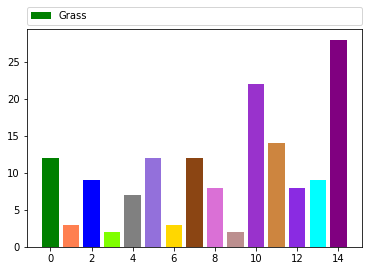

In [113]:
fig, ax = plt.subplots(sharey=True)
# Plot types of each generation    
ax.bar(np.arange(15), gen_type[1].values, color=color_mapping)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=15, mode="expand", borderaxespad=0., labels=list(types[:15]))
#plt.legend(types[:15])
plt.show()

In [7]:
# TO DO remove primals when getting images
# Finish obtaining images

In [87]:
for numbers in range(300, 400):
    str_num = "{0:0=3d}".format(numbers)
    link = 'https://www.serebii.net/pokedex-sm/' + str_num + '.shtml'
    
    name = basic_df.iloc[numbers-1]['name'].replace(' ', '_').lower()
    filename = name + '_' + link.split('/')[-1].split('.')[0]
    request = requests.get(link).text
    soup = BeautifulSoup(request, 'html.parser')
    pre_fix = 'https://serebii.net'
    img = soup.findAll("img")[9].get("src")
    img_downloaded = urllib.request.urlopen(pre_fix + img).read()
    imagefile = open(filename + ".jpeg", 'wb')
    imagefile.write(img_downloaded)
    imagefile.close()

In [61]:
images = glob('images/*')
images[:10]

['images/bellsprout_069.jpeg',
 'images/dragonite_149.jpeg',
 'images/marowak_105.jpeg',
 'images/rhyhorn_111.jpeg',
 'images/hitmonchan_107.jpeg',
 'images/goldeen_118.jpeg',
 'images/kangaskhan_115.jpeg',
 'images/geodude_074.jpeg',
 'images/moltres_146.jpeg',
 'images/cloyster_091.jpeg']

In [84]:
def display_pokemon(images, n):
        fig = plt.figure(figsize=(10,10))
        for i in range(n):
            pk_img = np.random.choice(images)
            pk_name = pk_img.split('/')[-1].split('_')[0].title()
            img = cv2.imread(pk_img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img[np.where((img == [0,0,0]).all(axis = 2))] = [255,255,255]
            ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
            ax.set_title(pk_name)
            ax.axis('off')
            ax.imshow(img)
        plt.show()

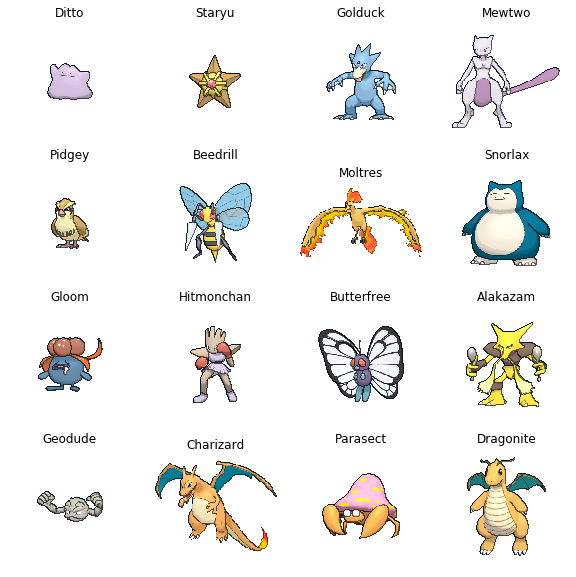

In [85]:
display_pokemon(images, 16)

The dataset contains all generations, starting from Gen 1 (Red and Blue) to Gen 7 (Sun and Moon)

In [27]:
df['generation'].unique()

array([1, 2, 3, 4, 5, 6])

The best pokemon for each stat

In [29]:
stats = df.columns[4:11]
for col in stats:
    pkmon = df['name'][df[col].argmax()]
    print('{} has the highest {} stat'.format(pkmon, col))

MewtwoMega Mewtwo X has the highest total stat
Blissey has the highest hp stat
MewtwoMega Mewtwo X has the highest attack stat
SteelixMega Steelix has the highest defense stat
MewtwoMega Mewtwo Y has the highest sp._atk stat
Shuckle has the highest sp._def stat
DeoxysSpeed Forme has the highest speed stat


How many legendries are there?

In [33]:
print('There are {} legendary pokemon'.format(sum(df['legendary'])))

There are 65 legendary pokemon


In [42]:
df['name'][df['legendary']]

156                    Articuno
157                      Zapdos
158                     Moltres
162                      Mewtwo
163         MewtwoMega Mewtwo X
164         MewtwoMega Mewtwo Y
262                      Raikou
263                       Entei
264                     Suicune
269                       Lugia
270                       Ho-oh
414                    Regirock
415                      Regice
416                   Registeel
417                      Latias
418           LatiasMega Latias
419                      Latios
420           LatiosMega Latios
421                      Kyogre
422         KyogrePrimal Kyogre
423                     Groudon
424       GroudonPrimal Groudon
425                    Rayquaza
426       RayquazaMega Rayquaza
427                     Jirachi
428          DeoxysNormal Forme
429          DeoxysAttack Forme
430         DeoxysDefense Forme
431           DeoxysSpeed Forme
537                        Uxie
                 ...           
543     

Now for some plots

pokemon distribution by types

In [ ]:
plt.plot()